<a href="https://colab.research.google.com/github/agusserraa98/Telecom-churn-prediction/blob/main/Telecom_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





1.   Levantar dataset con pandas


In [4]:
## Imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import statsmodels.api 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score,StratifiedKFold,learning_curve
from sklearn.metrics import classification_report,f1_score, recall_score, precision_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC
%matplotlib inline

In [5]:
df =pd.read_csv("drive/My Drive/datasets/telecom_customer_churn/telecom_customer_churn.csv")
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

Buscamos las variables que tienen demasiados valores de NaN, no aportan nada:

*   Churn Category
*   Churn Reason

Y las eliminamos del dataset

In [7]:
df = df.drop(['Churn Category','Churn Reason','Customer ID'],axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   City                               7043 non-null   object 
 5   Zip Code                           7043 non-null   int64  
 6   Latitude                           7043 non-null   float64
 7   Longitude                          7043 non-null   float64
 8   Number of Referrals                7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Offer                              7043 non-null   object 
 11  Phone Service                      7043 non-null   objec

Convertimos la variables Zip Code en 

In [9]:
df['Zip Code']=df['Zip Code'].astype('object')

Verificamos duplicados

In [10]:
df.duplicated().any()

False

Separamos variables categoricas y numericas

In [11]:
df_num = df.select_dtypes('number')
df_object = df.select_dtypes('object')

## EDA
### Numerical Analisis

In [12]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                7043 non-null   int64  
 1   Number of Dependents               7043 non-null   int64  
 2   Latitude                           7043 non-null   float64
 3   Longitude                          7043 non-null   float64
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Avg Monthly Long Distance Charges  6361 non-null   float64
 7   Avg Monthly GB Download            5517 non-null   float64
 8   Monthly Charge                     7043 non-null   float64
 9   Total Charges                      7043 non-null   float64
 10  Total Refunds                      7043 non-null   float64
 11  Total Extra Data Charges           7043 non-null   int64

In [13]:
df_num.describe()

,Age,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


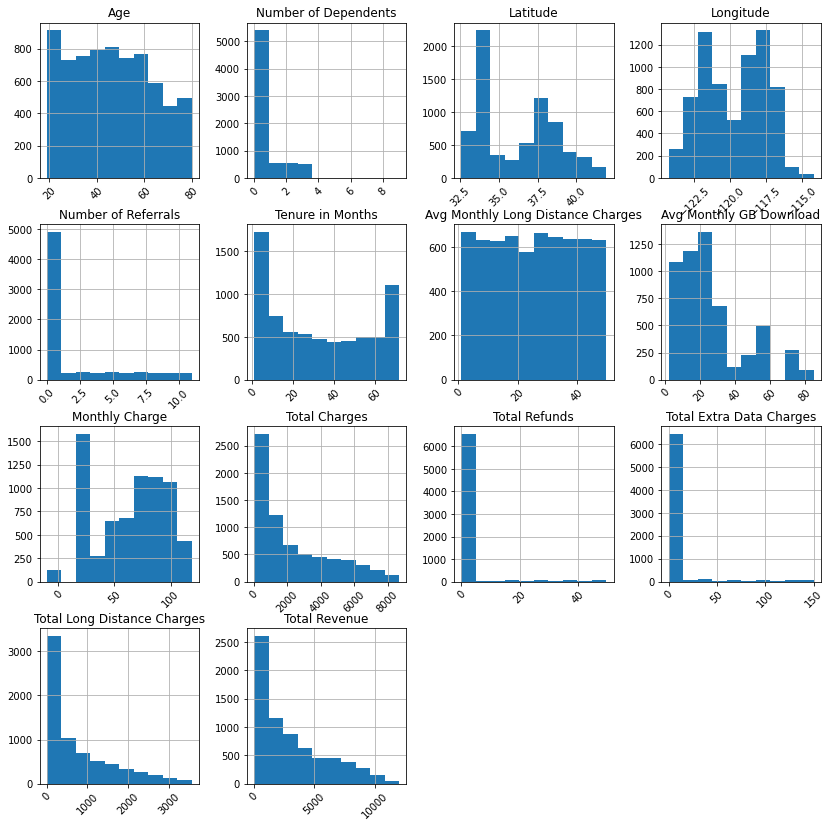

In [14]:
df_num.hist(figsize=(14,14), xrot=45);


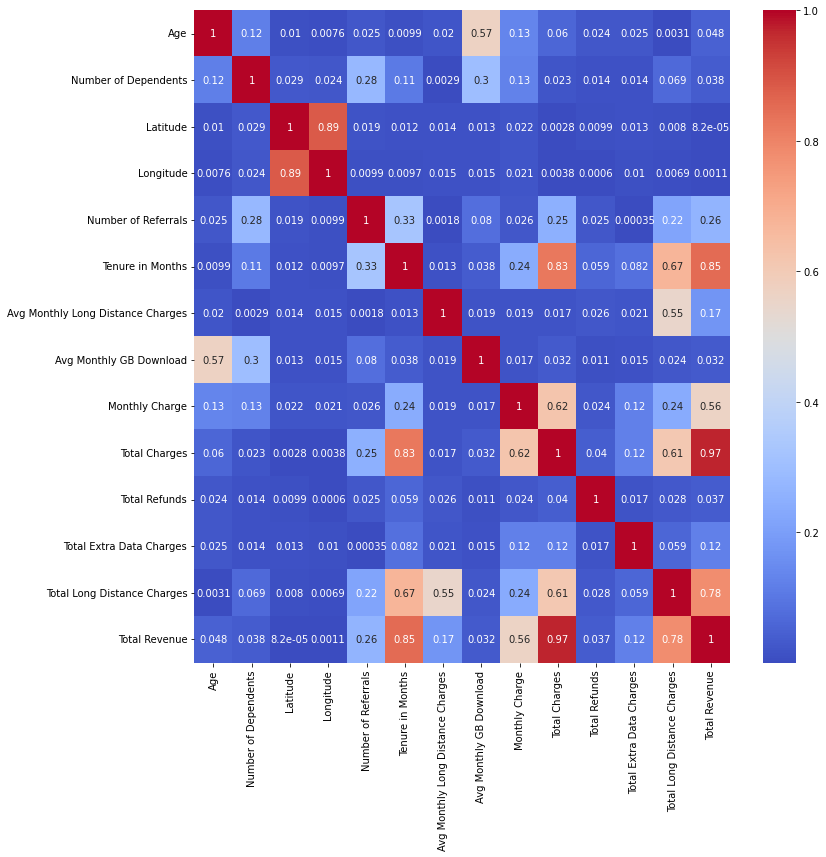

In [15]:
cor = df_num.join(df_object['Customer Status']).corr().abs()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(cor, annot=True, ax = ax, cmap='coolwarm');

In [16]:
s = cor.unstack()
so = s.replace(1,0).sort_values(kind="quicksort",ascending=False)[:20]
print(so)

Total Charges                Total Revenue                  0.972212
Total Revenue                Total Charges                  0.972212
Latitude                     Longitude                      0.885979
Longitude                    Latitude                       0.885979
Total Revenue                Tenure in Months               0.853146
Tenure in Months             Total Revenue                  0.853146
Total Charges                Tenure in Months               0.826074
Tenure in Months             Total Charges                  0.826074
Total Long Distance Charges  Total Revenue                  0.778559
Total Revenue                Total Long Distance Charges    0.778559
Total Long Distance Charges  Tenure in Months               0.674149
Tenure in Months             Total Long Distance Charges    0.674149
Total Charges                Monthly Charge                 0.622810
Monthly Charge               Total Charges                  0.622810
Total Long Distance Charges  Total

In [17]:

print('Number of unique categories in Zip Code: %i'% df['Zip Code'].nunique())
print('Number of unique categories in City: %i'% df['City'].nunique())

Number of unique categories in Zip Code: 1626
Number of unique categories in City: 1106


Con base en los mapas de correlación, podemos descartar los Cargos totales y los Cargos totales de larga distancia que están altamente correlacionados con los Ingresos totales.

Además, la ciudad, el código postal, la latitud y la longitud se pueden eliminar del conjunto de datos, ya que son demasiado personales y específicos para ser útiles en el paso de entrenamiento. Además, para cada categoría tenemos muy pocos ejemplos para ser significativos.

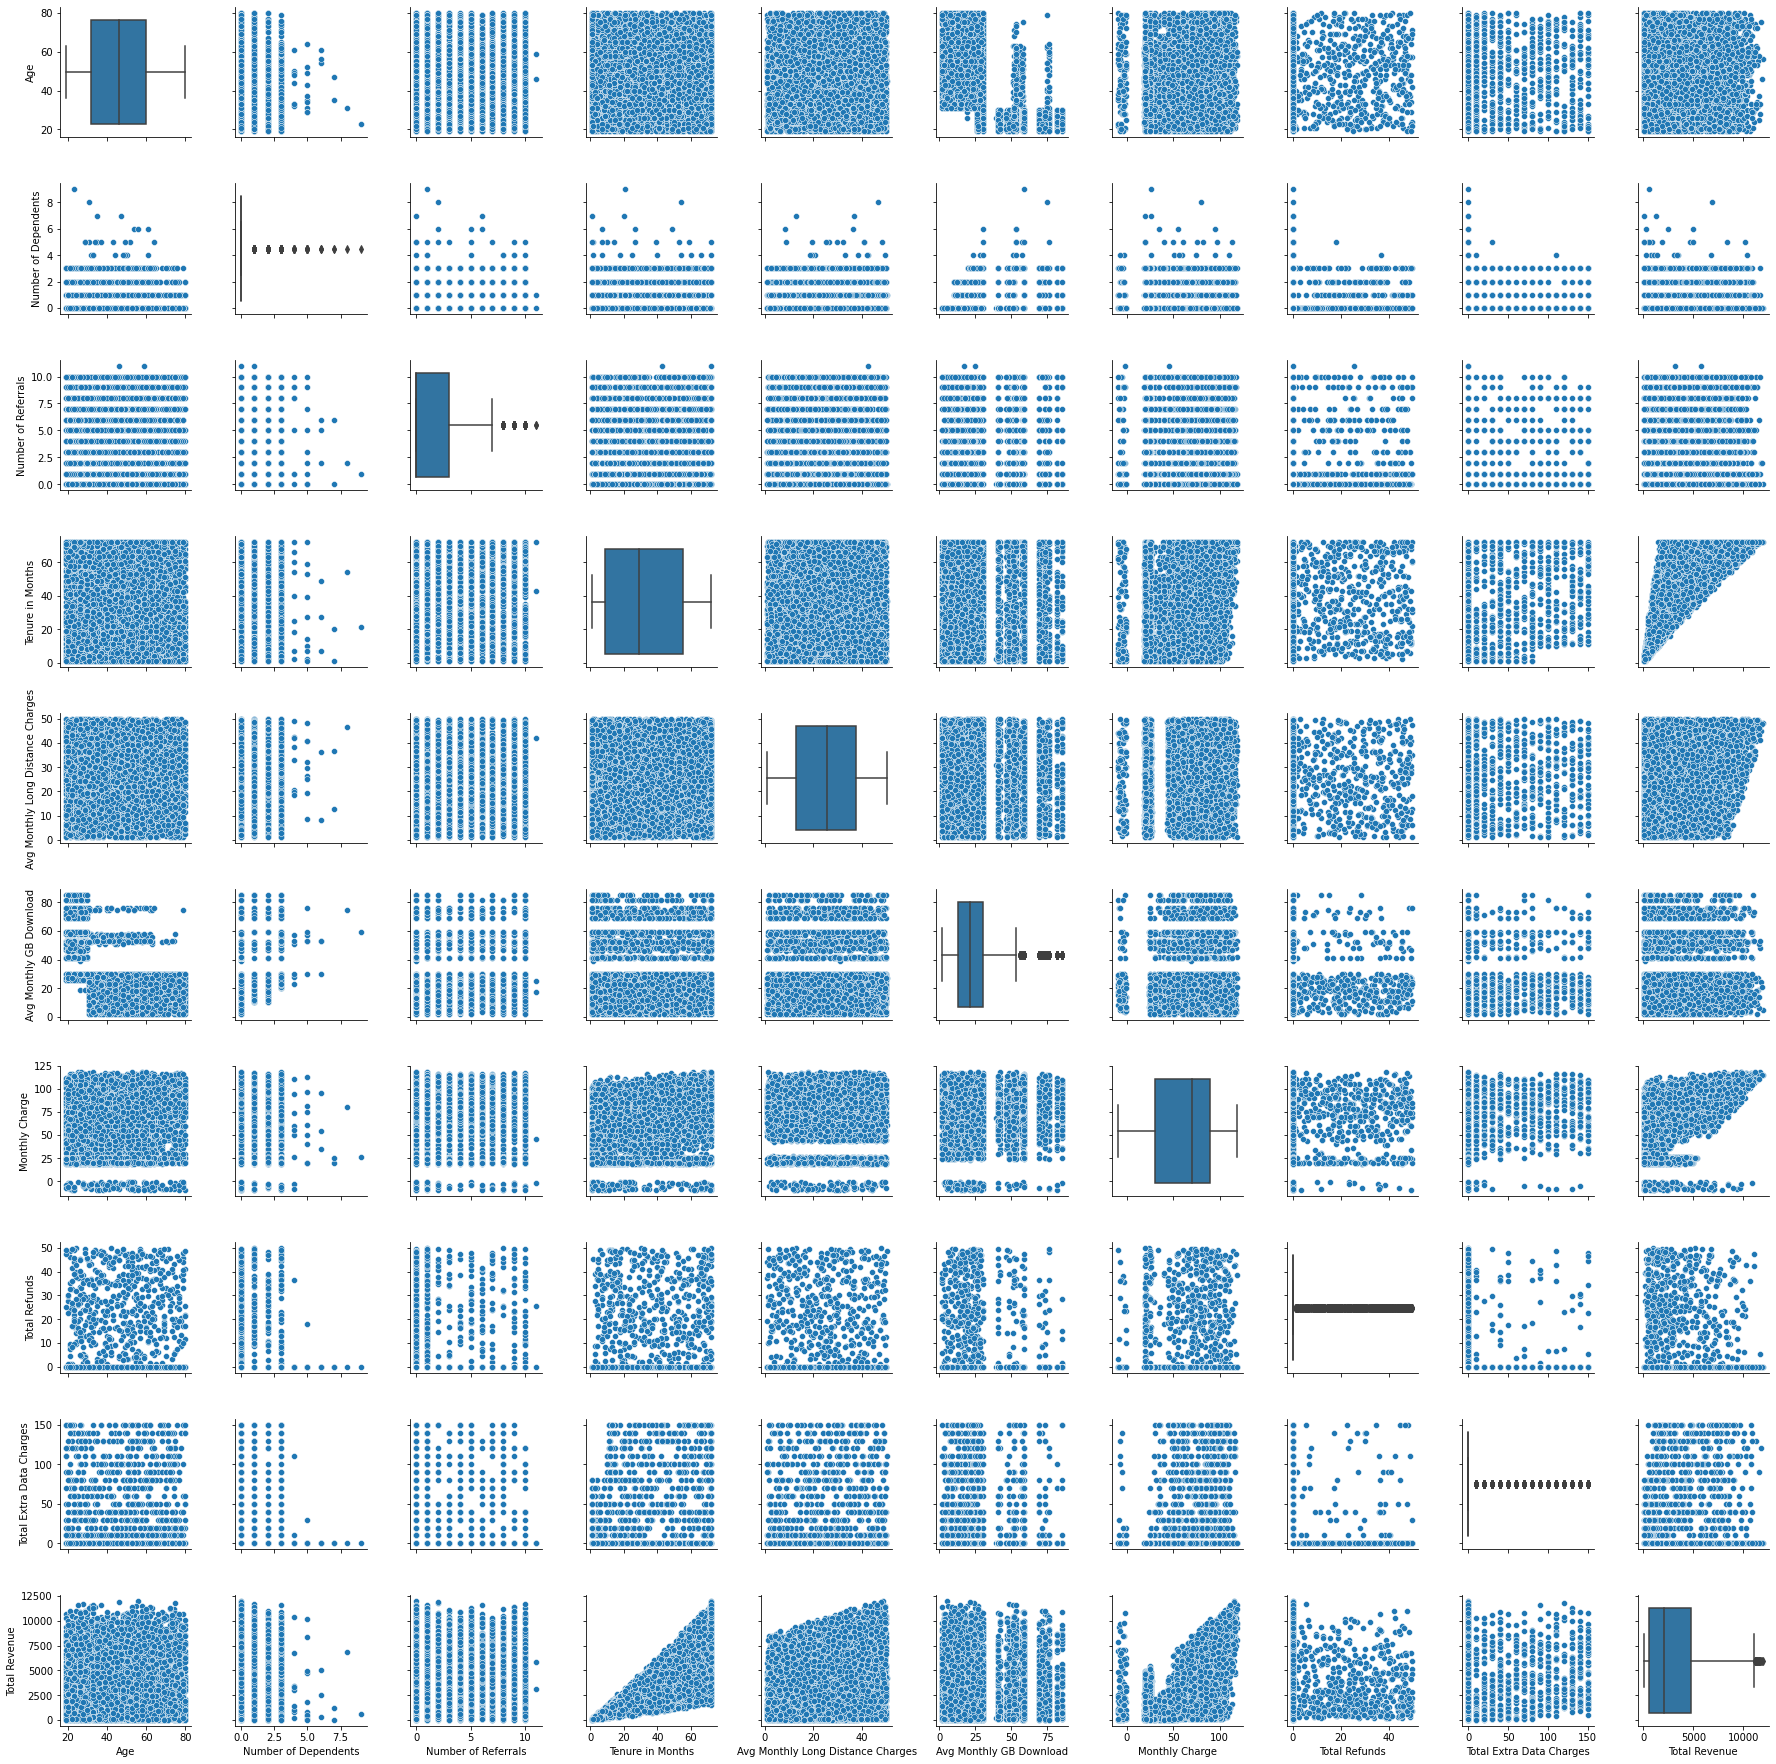

In [18]:
df_num = df_num.drop(['Total Charges','Total Long Distance Charges','Longitude','Latitude'],axis=1)
p = sns.PairGrid(df_num);
p.map_diag(sns.boxplot)
p.map_offdiag(sns.scatterplot)


El diagrama de dispersión no muestra ninguna correlación adicional entre las variables continuas.

Los diagramas de caja muestran que las características:
* 'Descarga mensual promedio de GB'
* 'Reembolsos totales'
* 'Número de dependientes'
* 'Número de referencias'
*  'Cargos totales de datos adicionales' 

deben analizarse más a fondo.




### Avg Monthly GB Download  



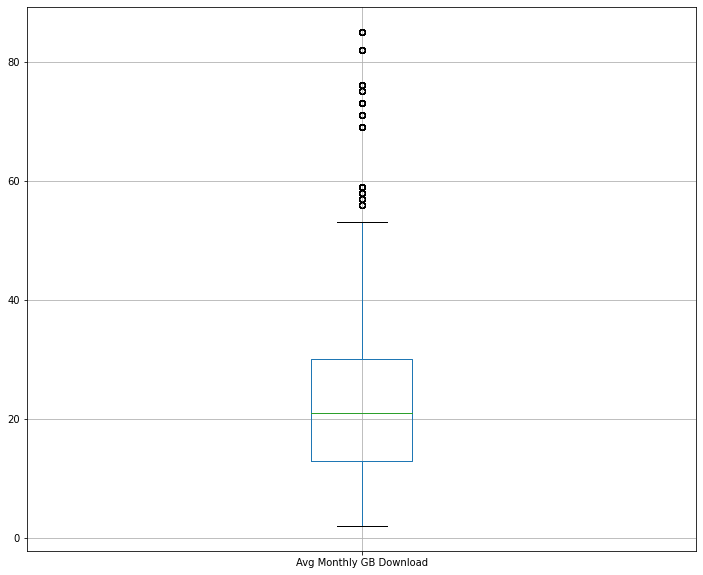

In [19]:
df_num[['Avg Monthly GB Download']].boxplot(figsize=(12,10))


Hay demasiados ouliers, una de las posibilidades es ver que relacion tiene con la edad del cliente.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 <a list of 62 Text major ticklabel objects>)

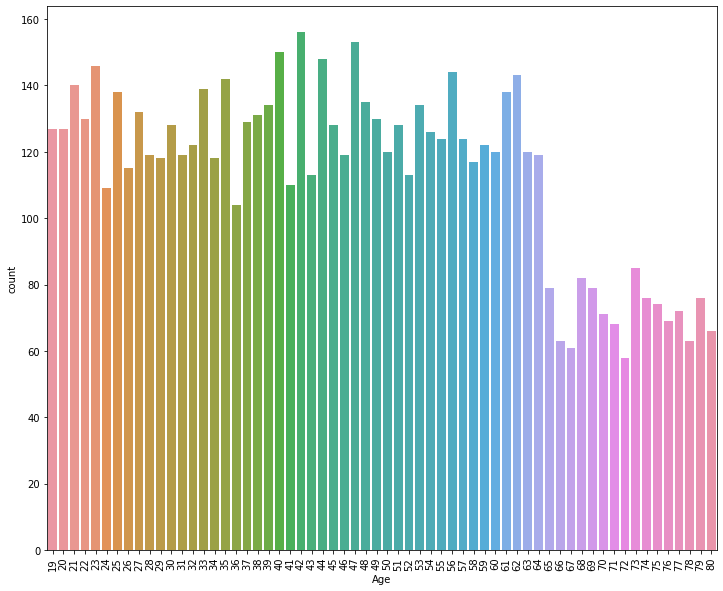

In [25]:
plt.figure(figsize=(12,10))
sns.countplot(df['Age'])
plt.xticks(rotation=90)

Organizamos en buchets para mejor interpretacion

In [26]:
bins = [19,30,45,60,80]
names = ['19-30','30-45','45-60','60-80']
df_object['AgeRange'] = pd.cut(df['Age'],bins, labels=names,include_lowest=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 1152x1008 with 0 Axes>

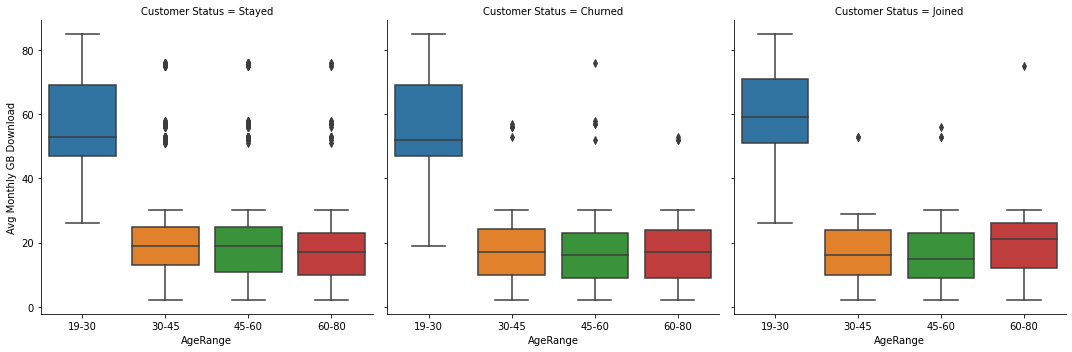

In [27]:
plt.figure(figsize=(16,14))
sns.catplot(data=df_object.join(df_num),x='AgeRange',y='Avg Monthly GB Download', col='Customer Status', kind='box')

El grupo de menor edad tiene el mayor flujo de descarga de datos.

**Total Extra Data Charges, Number of Dependents, Total Refunds and Number of Referrals:**

Unique values population




In [35]:
pd.concat(
    [
      df['Total Extra Data Charges'].value_counts(normalize=True).reset_index(),
      df['Number of Dependents'].value_counts(normalize=True).reset_index(),
      df['Total Refunds'].value_counts(normalize=True).reset_index(),
      df['Number of Referrals'].value_counts(normalize=True).reset_index()
    ], axis=1).rename(columns={'index':'value'})

,value,Total Extra Data Charges,value,Number of Dependents,value,Total Refunds,value,Number of Referrals
0,0.0,0.896635,0.0,0.768990,0.00,0.925458,0.0,0.542524
1,10.0,0.019594,1.0,0.078518,16.56,0.000284,1.0,0.154196
2,40.0,0.008803,2.0,0.075394,8.74,0.000284,5.0,0.037484
3,30.0,0.008235,3.0,0.073406,1.31,0.000284,3.0,0.036206
4,20.0,0.007241,5.0,0.001420,41.74,0.000284,7.0,0.035212
...,...,...,...,...,...,...,...,...
495,NaN,NaN,NaN,NaN,31.90,0.000142,NaN,NaN
496,NaN,NaN,NaN,NaN,12.07,0.000142,NaN,NaN
497,NaN,NaN,NaN,NaN,37.37,0.000142,NaN,NaN
498,NaN,NaN,NaN,NaN,48.59,0.000142,NaN,NaN



'Reembolsos totales', 'Número de dependientes', 'Número de referencias' y 'Cargos totales de datos adicionales' se completan principalmente con valores cero, por lo que podrían transformarse en una variable categórica binaria¶

In [36]:
df_object.loc[:,'Refunds_cat'] = np.where(df['Total Refunds'] == 0,'NO','YES')
df_object.loc[:,'Dependents_cat'] = np.where(df['Number of Dependents'] == 0,'NO','YES')
df_object.loc[:,'Extra_Data_Charges_cat'] = np.where(df['Total Extra Data Charges'] == 0,'NO','YES')
df_object.loc[:,'Referrals_cat'] = np.where(df['Number of Referrals'] == 0, 'NO', 'Yes')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [38]:
df_num.columns

Index(['Age', 'Number of Dependents', 'Number of Referrals',
       'Tenure in Months', 'Avg Monthly Long Distance Charges',
       'Avg Monthly GB Download', 'Monthly Charge', 'Total Refunds',
       'Total Extra Data Charges', 'Total Revenue'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/boxplot.py:405: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds,
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isi

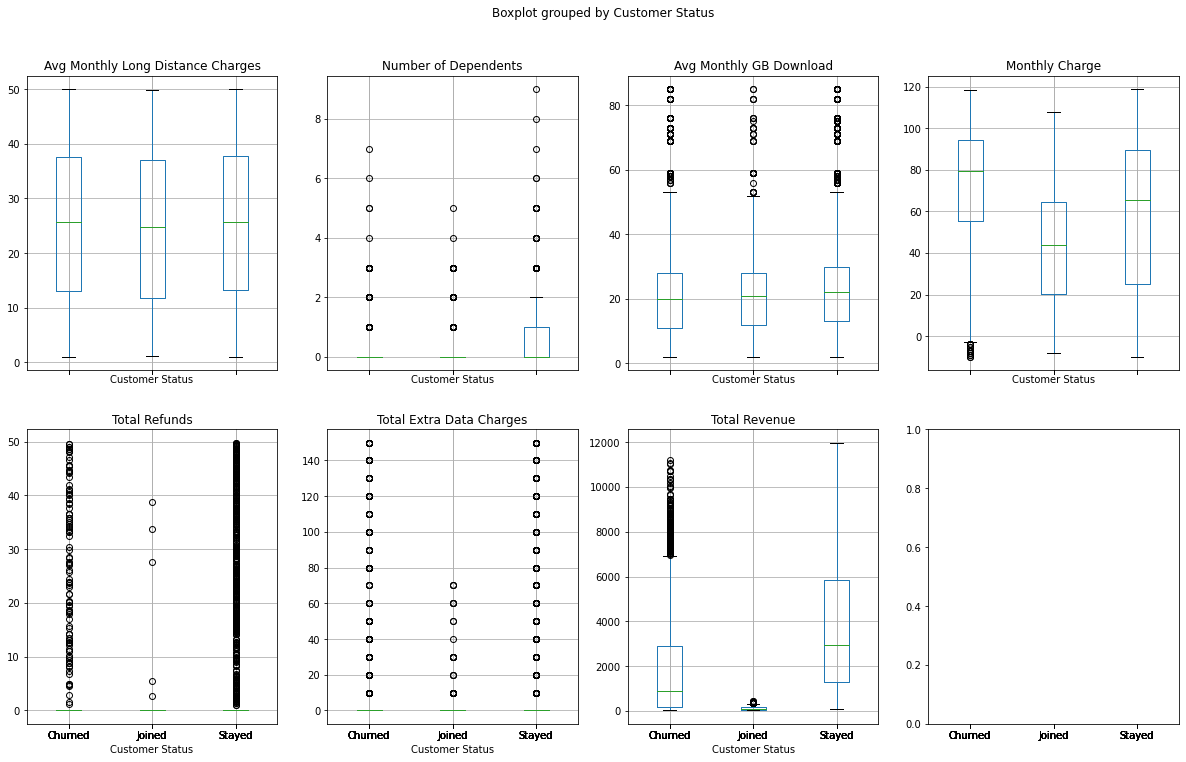

In [41]:
fig, axes = plt.subplots(2,4,sharex=True,sharey=False,figsize=(20,12))
df_num.join(df['Customer Status']).boxplot(
    ['Avg Monthly Long Distance Charges','Number of Dependents','Avg Monthly GB Download','Monthly Charge','Total Refunds','Total Extra Data Charges','Total Revenue'],
    'Customer Status',ax=axes.flatten()[:-1]);

**De esta grafica podemos obtener que los clientes con Monthly Charge mas alto deja(todo lo que gasto en servicios de la compañia) deja el servicio**

<Figure size 864x720 with 0 Axes>

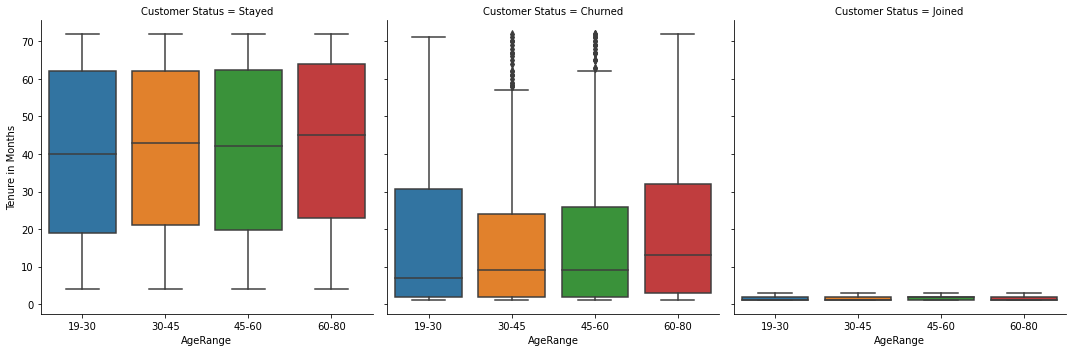

In [42]:
plt.figure(figsize=(12,10))
sns.catplot(data=df_object.join(df_num),x='AgeRange',y='Tenure in Months',kind='box',col='Customer Status')


**Por lo general luego de 30 meses el cliente permanece fiel a la empresa**
> Seria util crear una variable binaria si es fie o no(Tenure > 30 )



In [43]:
df_object.loc[:,'is_loyal'] = np.where(df['Tenure in Months'] >= 30, 'Yes','No')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
